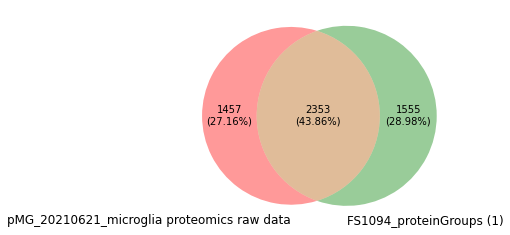

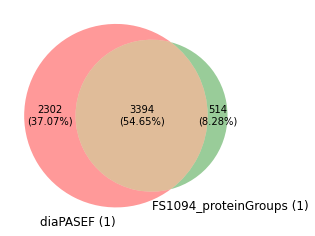

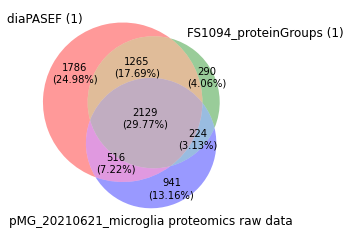

In [9]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
from matplotlib_venn import venn3
import xlrd
import xlsxwriter
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
namea='FS1094_proteinGroups (1)'
nameb='pMG_20210621_microglia proteomics raw data'
namec='diaPASEF (1)'
sheeta=xlrd.open_workbook(namea+'.xlsx').sheet_by_index(0)
sheetb=xlrd.open_workbook(nameb+'.xlsx').sheet_by_index(0)
sheetc=xlrd.open_workbook(namec+'.xlsx').sheet_by_index(0)
samplenuma=len(sheeta.col_values(1))
samplenumb=len(sheetb.col_values(6))
samplenumc=len(sheetc.col_values(3))
lista=[]
listb=[]
bpep=[]
blfq=[]
listc=[]
clfq=[]
for a in range(1,samplenuma):
    if type(sheeta.row_values(a)[6])==str:
        asplitlist=sheeta.row_values(a)[6].split(";")
        for u in range(len(asplitlist)):
            if asplitlist[u] not in lista:
                if ',' in asplitlist[u]:
                    lista+=[asplitlist[u].split(",")[0]]
                if ',' not in asplitlist[u]:
                    lista+=[asplitlist[u]]
for b in range(1,samplenumb):
    if type(sheetb.row_values(b)[6])==str:
        #print('Analyzing '+str(b)+' of '+str(samplenumb-1))
        bsplitlist=sheetb.row_values(b)[6].split(";")
        for x in range(len(bsplitlist)):
            if bsplitlist[x] not in listb:
                if ',' in bsplitlist[x]:
                    listb+=[bsplitlist[x].split(",")[0]]
                if ',' not in bsplitlist[x]:
                    listb+=[bsplitlist[x]]
                bpep+=[str(sheetb.row_values(b)[9])]
                blfq+=[str(sum(sheetb.row_values(b)[128:142])/len(sheetb.row_values(b)[128:142]))]
for c in range(1,samplenumc):
    if type(sheetc.row_values(c)[3])==str:
        #print('Analyzing '+str(c)+' of '+str(samplenumc-1))
        csplitlist=sheetc.row_values(c)[3].split(";")
        for y in range(len(csplitlist)):
            if csplitlist[y] not in listc:
                if ',' in csplitlist[y]:
                    listc+=[csplitlist[y].split(",")[0]]
                if ',' not in csplitlist[y]:
                    listc+=[csplitlist[y]]
                clfq+=[str(sheetc.row_values(c)[5])]
set1 = set(lista)
set2 = set(listb)
set3 = set(listc)
total2 = len(set1.union(set2))
total3 = len(set1.union(set3))
total = len(set1.union(set2,set3))
venn2([set2, set1], (nameb, namea), subset_label_formatter=lambda x: str(x) + "\n(" + f"{(x/total2):1.2%}" + ")")
plt.savefig(namea+' '+nameb+' Venn Diagram.pdf')
plt.show()
venn2([set3, set1], (namec, namea), subset_label_formatter=lambda x: str(x) + "\n(" + f"{(x/total3):1.2%}" + ")")
plt.savefig(namea+' '+namec+' Venn Diagram.pdf')
plt.show()
venn3([set3, set1, set2], (namec, namea, nameb), subset_label_formatter=lambda x: str(x) + "\n(" + f"{(x/total):1.2%}" + ")")
plt.savefig('Combined Venn Diagram.pdf')
plt.show()
workbook = xlsxwriter.Workbook('Gene List.xlsx')
worksheet1 = workbook.add_worksheet('Combined Overlap')
combinedoverlap=set1.intersection(set2,set3)
overlap12=list(set1.intersection(set2))
overlap13=list(set1.intersection(set3))
worksheet1.write(0, 0, 'Genes')
worksheet1.write(0, 2, 'Intersection of '+namea+' and '+nameb+' and '+namec)
for k in range(len(combinedoverlap)):
    worksheet1.write(k+1, 0, list(combinedoverlap)[k])
worksheet2 = workbook.add_worksheet('Starting Set Genes') 
worksheet2.write(0, 0, namea)
worksheet2.write(0, 2, nameb)
worksheet2.write(0, 4, namec)
for l in range(len(set1)):
    worksheet2.write(l+1, 0, list(set1)[l])
for m in range(len(set2)):
    worksheet2.write(m+1, 2, list(set2)[m])
for n in range(len(set3)):
    worksheet2.write(n+1, 4, list(set3)[n])
worksheet3 = workbook.add_worksheet('Intersection 1') 
worksheet3.write(0, 0, 'Genes')
worksheet3.write(0, 1, 'LFQ')
worksheet3.write(0, 2, 'Peptides')
worksheet3.write(0, 4, 'Intersection of '+namea+' '+nameb)
for p in range(len(overlap12)):
    bindex=listb.index(overlap12[p])
    worksheet3.write(p+1, 0, listb[bindex])
    worksheet3.write(p+1, 1, float(blfq[bindex]))
    worksheet3.write(p+1, 2, float(bpep[bindex]))
worksheet4 = workbook.add_worksheet('Intersection 2')
worksheet4.write(0, 0, 'Genes')
worksheet4.write(0, 1, 'LFQ')
worksheet4.write(0, 3, 'Intersection of '+namea+' '+namec)
for q in range(len(overlap13)):
    cindex=listc.index(overlap13[q])
    worksheet4.write(q+1, 0, listc[cindex])
    worksheet4.write(q+1, 1, float(clfq[cindex]))
workbook.close()

In [26]:
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [27]:
df=pd.read_excel('ms.xls')

In [28]:
df

,Unnamed: 0,pMG,iMG1,iMG2,Cytokine,nlog10pvalue,log2fc
0,A2M,0.000050,0.000593,0.000308,EGF,0.397292,-0.091158
1,AAAS,0.000000,0.000298,0.000056,Eotaxin,0.093410,0.012392
2,AACS,0.000000,0.000000,0.000000,FGF-2,0.257344,0.102738
3,AAGAB,0.000000,0.000005,0.000033,FLT-3L,0.062019,0.018956
4,AAK1,0.000024,0.000003,0.000033,Fractalkine,2.043963,0.203334
...,...,...,...,...,...,...,...
8716,ZWILCH,0.000000,0.000000,0.000000,NaN,NaN,NaN
8717,ZWINT,0.000000,0.000000,0.000000,NaN,NaN,NaN
8718,ZYG11B,0.000000,0.000000,0.000007,NaN,NaN,NaN
8719,ZYX,0.000067,0.000074,0.000041,NaN,NaN,NaN


In [29]:
pmg=list(df['pMG'])
pasef=list(df['iMG1'])
diapasef=list(df['iMG2'])
index=list(df['Unnamed: 0'])
dfp = pd.DataFrame(list(zip(index, pmg, pasef)),
               columns =['gene', 'pmg', 'pasef']).set_index('gene').replace([np.inf, 0,-np.inf], np.nan).dropna(axis=0)
dfd = pd.DataFrame(list(zip(index, pmg, diapasef)),
               columns =['gene', 'pmg', 'diapasef']).set_index('gene').replace([np.inf, 0,-np.inf], np.nan).dropna(axis=0)

In [38]:
dfp.to_csv('pasef.csv')

In [39]:
dfd.to_csv('diapasef.csv')

Text(0.5, 1.0, 'KendalltauResult(correlation=0.3812081304648214, pvalue=0.0)pearsonr=(0.27387192953146894, 7.524504603308197e-150)')

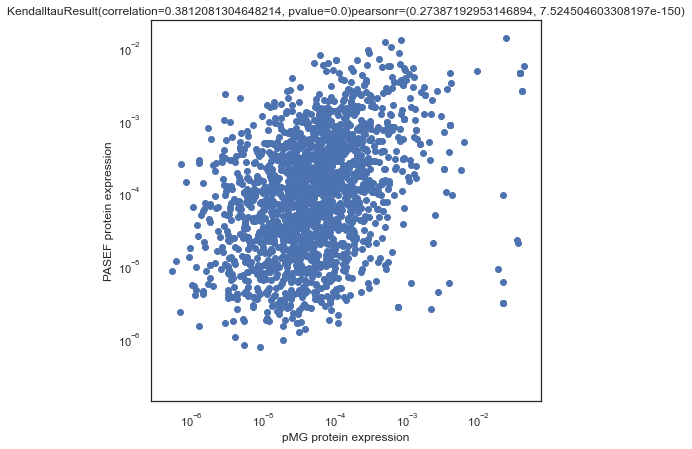

In [34]:
sns.set_theme(style="white")
f, ax = plt.subplots(figsize=(7, 7))
ax.set(xscale="log", yscale="log")
plt.scatter(a,b)
plt.xlabel('pMG protein expression')
plt.ylabel('PASEF protein expression')
plt.xticks()
plt.title(str(stats.kendalltau(a,b))+'pearsonr='+str(stats.pearsonr(a,b)))

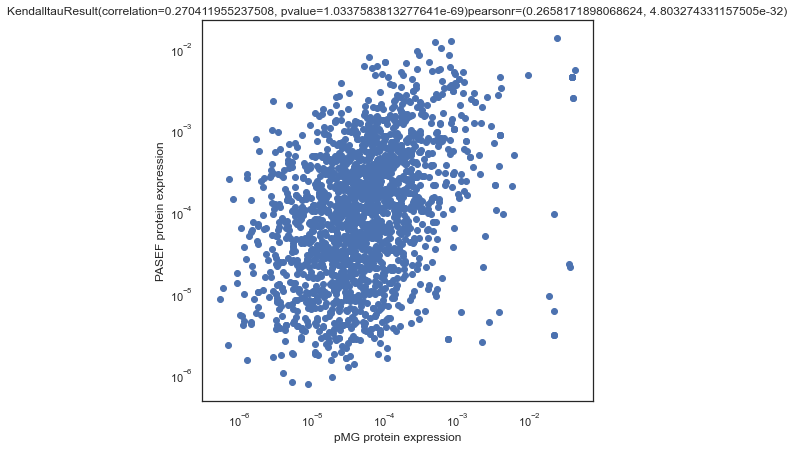

In [24]:
a=list(dfp['pmg'])
b=list(dfp['pasef'])
sns.set_theme(style="white")
f, ax = plt.subplots(figsize=(7, 7))
ax.set(xscale="log", yscale="log")
plt.scatter(a,b)
plt.xlabel('pMG protein expression')
plt.ylabel('PASEF protein expression')
plt.xticks()
plt.title(str(stats.kendalltau(a,b))+'pearsonr='+str(stats.pearsonr(a,b)))
plt.savefig('pmgpasef.pdf')

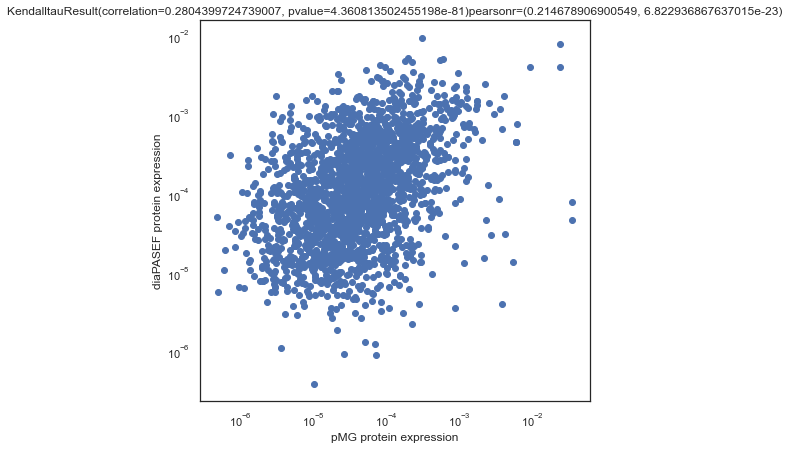

In [25]:
a=list(dfd['pmg'])
b=list(dfd['diapasef'])
sns.set_theme(style="white")
f, ax = plt.subplots(figsize=(7, 7))
ax.set(xscale="log", yscale="log")
plt.scatter(a,b)
plt.xlabel('pMG protein expression')
plt.ylabel('diaPASEF protein expression')
plt.xticks()
plt.title(str(stats.kendalltau(a,b))+'pearsonr='+str(stats.pearsonr(a,b)))
plt.savefig('pmgdiapasef.pdf')